# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.



In [1]:
# import all the necessary python packages
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns
from tweepy import OAuthHandler
from timeit import default_timer as timer

**1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)**

In [2]:
# Load the csv file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Open the file
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


**2. Use the Requests library to download the tweet image prediction file programmatically (image_predictions.tsv)**

In [4]:
#Downlod the file programmatically. Response 200 means it is successful
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [5]:
#Save the file is a folder
with open(url.split('/')[-1], mode = 'wb') as file:
    file.write(response.content)

In [6]:
# Load the file
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')

In [7]:
#Open the dataframe
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


**3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)**

In [ ]:
 Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [8]:
# load twitter API data
with open('tweet_json.txt') as f:
    twitter_api = pd.DataFrame((json.loads(line) for line in f), columns = ['id', 'favorite_count', 'retweet_count'])

# change column names
twitter_api.columns = ['tweet_id', 'favorites', 'retweets']
# display few lines
twitter_api.head()

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## Assessing Data
In this section, at least **eight (8) quality issues and two (2) tidiness issue** are detected and documented .**Both** visual assessment and programmatic assessement were used to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.

* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.




**Visual Assessment -: twitter_archive_enhanced.csv**

In [9]:
#Open the file
twitter_archive.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2271,667495797102141441,NaN,NaN,2015-11-20 00:12:54 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Philippe from Soviet Russia. Commandin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667495797...,9,10,Philippe,None,None,None,None
2084,670807719151067136,NaN,NaN,2015-11-29 03:33:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Say hello to Andy. He can balance on one foot,...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/670807719...,11,10,Andy,None,None,None,None
477,815990720817401858,NaN,NaN,2017-01-02 18:38:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jack. He's one of the rare doggos that do...,NaN,NaN,NaN,https://www.gofundme.com/surgeryforjacktheminp...,11,10,Jack,None,None,None,None
232,847962785489326080,NaN,NaN,2017-04-01 00:04:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Georgie. He's very shy. Only puppears ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/847962785...,10,10,Georgie,None,None,None,None
49,882762694511734784,NaN,NaN,2017-07-06 00:46:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gus. He's quite the cheeky pupper. Alr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/882762694...,12,10,Gus,None,None,pupper,None
754,778764940568104960,NaN,NaN,2016-09-22 01:16:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god it's Narcos but Barkos. 13/10 someon...,NaN,NaN,NaN,https://m.youtube.com/watch?v=idKxCMsS3FQ&feat...,13,10,None,None,None,None,None
106,871879754684805121,NaN,NaN,2017-06-06 00:01:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lassie. She's celebrating #PrideM...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871879754...,13,10,Lassie,None,None,None,None
289,838201503651401729,NaN,NaN,2017-03-05 01:36:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Sunny. He can take down a ...,8.207497e+17,4.196984e+09,2017-01-15 21:49:15 +0000,https://twitter.com/dog_rates/status/820749716...,13,10,Sunny,None,None,None,None
372,828381636999917570,NaN,NaN,2017-02-05 23:15:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Doobert. He's a deaf doggo. Didn't stop h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/828381636...,14,10,Doobert,doggo,None,None,None
2118,670420569653809152,NaN,NaN,2015-11-28 01:54:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Damon. The newest presidential candida...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670420569...,10,10,Damon,None,None,None,None


In [10]:
# Further analyse the source column
twitter_archive.source

0       <a href="http://twitter.com/download/iphone" r...
1       <a href="http://twitter.com/download/iphone" r...
2       <a href="http://twitter.com/download/iphone" r...
3       <a href="http://twitter.com/download/iphone" r...
4       <a href="http://twitter.com/download/iphone" r...
                              ...                        
2351    <a href="http://twitter.com/download/iphone" r...
2352    <a href="http://twitter.com/download/iphone" r...
2353    <a href="http://twitter.com/download/iphone" r...
2354    <a href="http://twitter.com/download/iphone" r...
2355    <a href="http://twitter.com/download/iphone" r...
Name: source, Length: 2356, dtype: object

> It is noted that:
> 1. The `source` column has unecessary html tags.
> 2. `doggo`, `floofer`, `pupper`, `puppo` columns should be narrowed down to one column with various categories

**Programmatic Assessment -: twitter_archive_enhanced.csv**

In [11]:
#Open the dataframe
twitter_archive.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2137,670046952931721218,NaN,NaN,2015-11-27 01:10:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ben &amp; Carson. It's impossible for ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670046952...,11,10,Ben,None,None,None,None
2256,667766675769573376,NaN,NaN,2015-11-20 18:09:16 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Calvin. He is a Luxembourgian Mayo. Ha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667766675...,9,10,Calvin,None,None,None,None
849,766008592277377025,NaN,NaN,2016-08-17 20:27:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Angel. She stole the @ShopWeRateDogs s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/766008592...,11,10,Angel,None,None,None,None
1589,686683045143953408,NaN,NaN,2016-01-11 22:56:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mona. She's a Yarborough Splishnsplash...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686683045...,11,10,Mona,None,None,pupper,None
482,815390420867969024,NaN,NaN,2017-01-01 02:53:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy New Year from the squad! 13/10 for all h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/815390420...,13,10,None,None,None,None,None
1119,731285275100512256,NaN,NaN,2016-05-14 00:49:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Solomon. He's a Beneroo Cumberflop. 12...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731285275...,12,10,Solomon,None,None,None,None
1113,733109485275860992,NaN,NaN,2016-05-19 01:38:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
1394,700002074055016451,NaN,NaN,2016-02-17 17:01:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Thumas. He covered himself in nanners ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700002074...,9,10,Thumas,None,None,None,None
1969,673317986296586240,NaN,NaN,2015-12-06 01:48:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Take a moment and appreciate how these two dog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673317986...,10,10,None,None,None,None,None
692,787111942498508800,NaN,NaN,2016-10-15 02:04:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Carl. He's very powerfu...,7.529324e+17,4.196984e+09,2016-07-12 18:27:35 +0000,"https://vine.co/v/OEppMFbejFz,https://vine.co/...",12,10,Carl,None,None,None,None


**Using the info function of pandas, the datatypes of the columns and the presence of any null values is investgated.**

In [12]:
# Check the datatypes of the columns in the dataset
# Check for null values in the dataset.
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

> It is noted that:
> 1. `in_reply_to_status_id `, `in_reply_to_user_id `, `retweeted_status_id`, `retweeted_status_user_id `, `retweeted_status_timestamp` and `expanded_urls `columns have null values.
> 2. `timestamp ` and `retweeted_status_timestamp ` columns datatype is string (object) instead of datetime datatype
> 3. `tweet_id ` column datatype is int instead of string
> 4. ` in_reply_to_status_id `, `in_reply_to_user_id ` column datatype is float instead of string

In [13]:
#Check for duplicates values in the dataset
twitter_archive.duplicated().sum()

0

There are no duplicated rows but we need to make sure there are no duplicated tweets. 

In [14]:
#Let us find the column names first
twitter_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [15]:
#Check for duplicaated in tweet_id column
twitter_archive.tweet_id.duplicated().sum()

0

In [16]:
# Analyse the name column
twitter_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

From visual analysis we see that lower case names are not real dog names. Let us analyse further below 

In [17]:
# Check if lowercase names are real names
lowercase = twitter_archive['name'].str.extract('(^[a-z]*)', expand = True)
lowercase.value_counts()

                2247
a                 55
the                8
an                 7
very               5
quite              4
one                4
just               4
not                2
getting            2
actually           2
mad                2
light              1
all                1
my                 1
life               1
officially         1
old                1
infuriating        1
incredibly         1
space              1
such               1
his                1
this               1
unacceptable       1
by                 1
dtype: int64

 Also during visual analysis there are names with only one letter

In [18]:
# Checking for presence of names with one letter
oneletter = twitter_archive['name'].str.extract('(^[a-z]|[A-Z]?$)', expand = True)
oneletter.value_counts()

     2244
a      65
t       9
o       6
v       5
q       4
j       4
m       3
g       2
i       2
l       2
n       2
s       2
b       1
h       1
D       1
Z       1
O       1
u       1
dtype: int64

**Visual Assessment -: image_predictions.tsv**

In [19]:
#Open the dataframe
image_predictions.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
667,682962037429899265,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,1,dingo,0.278600,False,Chihuahua,0.155207,True,loupe,0.153598,False
759,688804835492233216,https://pbs.twimg.com/media/CY8gWFRWUAAm1XL.jpg,3,malinois,0.199512,True,German_shepherd,0.096797,True,Saluki,0.082848,True
1465,778624900596654080,https://pbs.twimg.com/media/Cs47N3eWcAEmgiW.jpg,2,Airedale,0.786089,True,Irish_terrier,0.121488,True,Lakeland_terrier,0.014603,True
841,694905863685980160,https://pbs.twimg.com/media/CaTNMUgUYAAB6vs.jpg,1,bow_tie,0.449268,False,fur_coat,0.139099,False,black-footed_ferret,0.082232,False
822,693109034023534592,https://pbs.twimg.com/ext_tw_video_thumb/69310...,1,cocker_spaniel,0.740013,True,Welsh_springer_spaniel,0.088739,True,golden_retriever,0.047470,True
98,667766675769573376,https://pbs.twimg.com/media/CURiQMnUAAAPT2M.jpg,1,fire_engine,0.883493,False,tow_truck,0.074734,False,jeep,0.012773,False
452,674752233200820224,https://pbs.twimg.com/media/CV0zkzEU4AAzLc5.jpg,2,vizsla,0.665516,True,redbone,0.173366,True,basset,0.134783,True
1131,728046963732717569,https://pbs.twimg.com/media/ChqK2cVWMAAE5Zj.jpg,1,Newfoundland,0.255971,True,groenendael,0.175583,True,German_shepherd,0.164135,True
401,673689733134946305,https://pbs.twimg.com/media/CVltNgxWEAA5sCJ.jpg,1,Chesapeake_Bay_retriever,0.382220,True,American_Staffordshire_terrier,0.350140,True,seat_belt,0.098874,False
1388,766313316352462849,https://pbs.twimg.com/media/CqJ95SRWgAATPK_.jpg,1,toy_poodle,0.966896,True,miniature_poodle,0.016424,True,cocker_spaniel,0.010227,True


> It is noted that in columns `p1`, `p2` and `p3`, the names are separated with an underscore instead of white space.

> Also, the names start with both uppercase and lowercase.

**Programmatic Assessment -: image_predictions.tsv**

In [20]:
#open data frame
image_predictions.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1299,752519690950500352,https://pbs.twimg.com/media/CnF8qVDWYAAh0g1.jpg,3,swing,0.999984,False,Labrador_retriever,0.000010,True,Eskimo_dog,0.000001,True
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
781,689999384604450816,https://pbs.twimg.com/media/CZNexghWAAAYnT-.jpg,1,standard_poodle,0.444499,True,English_springer,0.129830,True,pug,0.073806,True
1873,845306882940190720,https://pbs.twimg.com/media/C7siH5DXkAACnDT.jpg,1,Irish_water_spaniel,0.567475,True,Labrador_retriever,0.169496,True,curly-coated_retriever,0.101518,True
398,673680198160809984,https://pbs.twimg.com/media/CVlkid8WoAAqDlB.jpg,1,Samoyed,0.989853,True,Arctic_fox,0.003344,False,chow,0.002802,True
1895,850019790995546112,https://pbs.twimg.com/media/C8vgfTsXgAA561h.jpg,3,Shetland_sheepdog,0.759907,True,collie,0.107405,True,Pembroke,0.052335,True
506,675898130735476737,https://pbs.twimg.com/media/CWFFt3_XIAArIYK.jpg,1,Labrador_retriever,0.407430,True,malinois,0.077037,True,pug,0.074597,True
663,682662431982772225,https://pbs.twimg.com/media/CXlN1-EWMAQdwXK.jpg,1,beagle,0.413824,True,Cardigan,0.263553,True,basset,0.167618,True
1039,712085617388212225,https://pbs.twimg.com/media/CeHWFksXIAAyypp.jpg,2,Shih-Tzu,0.625129,True,Tibetan_terrier,0.126897,True,Lhasa,0.119663,True
1791,830583320585068544,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


In [21]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
#Check for duplicated rows
image_predictions.duplicated().sum()


0

In [23]:
#Check for duplicated rows in the tweet_id column
image_predictions.tweet_id.duplicated().sum()

0

In [24]:
# Analyse the dataframe using describe
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [25]:
# Check for duplicated rows in jpg_url column
image_predictions.jpg_url.duplicated().sum()

66

In [26]:
#Check for duplicated jpg_url rows tweet_ids inn the twitter_archive dataframe
duplicated_jpg_url = image_predictions[image_predictions.duplicated('jpg_url')]['tweet_id']
twitter_archive.query('tweet_id in @duplicated_jpg_url')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
155,861769973181624320,NaN,NaN,2017-05-09 02:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: ""Good afternoon class today we'...",8.066291e+17,4.196984e+09,2016-12-07 22:38:52 +0000,https://twitter.com/dog_rates/status/806629075...,13,10,None,None,None,None,None
211,851953902622658560,NaN,NaN,2017-04-12 00:23:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Astrid. She's a guide d...,8.293743e+17,4.196984e+09,2017-02-08 17:00:26 +0000,https://twitter.com/dog_rates/status/829374341...,13,10,Astrid,doggo,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,759566828574212096,NaN,NaN,2016-07-31 01:50:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This... is a Tyrannosaurus rex....,7.395441e+17,4.196984e+09,2016-06-05 19:47:03 +0000,https://twitter.com/dog_rates/status/739544079...,10,10,None,None,None,None,None
895,759159934323924993,NaN,NaN,2016-07-29 22:53:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: AT DAWN...\nWE RIDE\n\n11/10 ht...,6.703191e+17,4.196984e+09,2015-11-27 19:11:49 +0000,https://twitter.com/dog_rates/status/670319130...,11,10,None,None,None,None,None
908,757729163776290825,NaN,NaN,2016-07-26 00:08:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Chompsky. He lives up t...,6.790626e+17,4.196984e+09,2015-12-21 22:15:18 +0000,https://twitter.com/dog_rates/status/679062614...,11,10,Chompsky,None,None,None,None
926,754874841593970688,NaN,NaN,2016-07-18 03:06:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Rubio. He has too much ...,6.791584e+17,4.196984e+09,2015-12-22 04:35:49 +0000,https://twitter.com/dog_rates/status/679158373...,11,10,Rubio,None,None,None,None


In [27]:
#Check for duplicated jpg_url rows tweet_ids inn the twitter_archive dataframe
twitter_archive.query('tweet_id in @duplicated_jpg_url')['retweeted_status_id'].count()

66

> It is noted that there are 66 rows that are retweets

In [28]:
#Check the names of dogs in column p1
image_predictions.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [29]:
#Check the names of dogs in column p1
image_predictions.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [30]:
#Check the names of dogs in column p1
image_predictions.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

> It is noted that some of the dog names are inanimate objects such as pot

**Visual Assessment -: tweet_json.txt**

In [31]:
#Open the dataframe
twitter_api.sample(20)

,tweet_id,favorites,retweets
1659,683030066213818368,2370,832
1014,746906459439529985,3168,336
1197,716791146589110272,5204,1474
1813,676613908052996102,1183,219
844,766313316352462849,7493,2166
1370,702217446468493312,5268,1526
2136,670040295598354432,801,118
131,866816280283807744,0,32883
2034,671729906628341761,9119,4795
693,786729988674449408,0,2827


> The `tweet_id` column should be the index column 

**Programmatic Assessment -: tweet_json.txt**

In [32]:
#Open the dataframe
twitter_api.sample(20)

,tweet_id,favorites,retweets
1835,676089483918516224,1431,483
724,782722598790725632,19250,6238
1283,708469915515297792,3357,926
2186,668975677807423489,1386,641
2234,668154635664932864,522,336
570,801538201127157760,9141,2391
1088,737678689543020544,5528,1509
2229,668226093875376128,323,115
93,874012996292530176,35501,11007
780,775729183532220416,14361,5302


In [33]:
# Analyse the dataframe using info
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tweet_id   2354 non-null   int64
 1   favorites  2354 non-null   int64
 2   retweets   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


> It is noted that there are no null values in the dataset

In [34]:
# Check duplicated rows
twitter_api.duplicated().sum()

0

> There are no duplicated rows in the dataset

In [35]:
#Check duplicated tweet_id columns
twitter_api.tweet_id.duplicated().sum()

0

### Quality issues
**twitter_archive**
* Presence of retweets columns that are not needed.

* Incorrect data types for `timestamp` and `rating_numerator`.

* Inaccurate dog names in the `name` column and NaN values represented by the word 'None'.

* The `source` column contains HTML code.

* `in_reply_to_status_id`, `in_reply_to_user_id` and `expanded_urls` columns contain mostly missing values.

**image_predictions**

* Presence of retweets (duplicated rows in column `jpg_url`)

* Columns `p1`, `p2` and `p3`, the names are separated with an underscore instead of white space.

* The configuration accuracy is to be in percentage.

**General**

* `tweet_id` column should be the index column in all datasets.

* Incorrect data type for the `tweet_id` columns in all datasets.


### Tidiness issues
* `doggo`, `floofer`, `pupper`, `puppo` columns should be narrowed down to one column with various categories.

*  Merge the three datasets.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [36]:
# Make copies of original pieces of data
twitter_archive_copy = twitter_archive.copy()
image_predictions_copy = image_predictions.copy()
twitter_api_copy = twitter_api.copy()

### Issue #1: 

There are tweet IDs that have `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp` values. These ids are that of retweets and won't be used for our analysis.

#### Define: 

Remove tweet IDs that have `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp` values. 

#### Code

In [37]:
# Drop retweeted rows
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy.retweeted_status_id.isnull()]
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy.retweeted_status_user_id.isnull()]
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy.retweeted_status_timestamp.isnull()]

#### Test

In [38]:
# Check if the retweets have been dropped
print(twitter_archive_copy.retweeted_status_id.notnull().sum())
print(twitter_archive_copy.retweeted_status_user_id.notnull().sum())
print(twitter_archive_copy.retweeted_status_timestamp.notnull().sum())

0
0
0


### Issue #2:

Tweet id are integers instead of strings.

#### Define

Convert datatype of the `tweet_id` columns in the twitter_archive_copy, image_predictions_copy and twitter_api_copy dataset respectively from integer to strings

#### Code

In [39]:
# Change the datatype to string
twitter_archive_copy['tweet_id'] = twitter_archive_copy['tweet_id'].astype(str);

In [40]:
# Change the datatype to string
image_predictions_copy['tweet_id'] = image_predictions_copy ['tweet_id'].astype(str);

In [41]:
# Change the datatype to string
twitter_api_copy['tweet_id'] = twitter_api_copy ['tweet_id'].astype(str);

#### Test

In [42]:
#Check the datatype
twitter_archive_copy['tweet_id'].dtype

dtype('O')

In [43]:
#Check the datatype
image_predictions_copy['tweet_id'].dtype

dtype('O')

In [44]:
#Check the datatype
twitter_api_copy['tweet_id'].dtype

dtype('O')

### Issue #3:

`tweet_id` column should be the index column in all datasets.

#### Define

Set the tweet_id column in each dataset as the index

#### Code

In [45]:
# Make the tweet_id column the index
twitter_archive_copy = twitter_archive_copy.set_index('tweet_id');

In [46]:
#Make the tweet_id column the index
image_predictions_copy = image_predictions_copy.set_index('tweet_id');

In [47]:
# Make the tweet_id column the index
twitter_api_copy = twitter_api_copy.set_index('tweet_id');

#### Test

In [48]:
#Check if tweet_id column is the index
twitter_archive_copy.sample(2)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
817536400337801217,NaN,NaN,2017-01-07 01:00:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Eugene &amp; Patti Melt. No matte...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817536400...,12,10,Eugene,None,None,None,None
879415818425184262,NaN,NaN,2017-06-26 19:07:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Duddles. He did an attempt. 13/10 some...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879415818...,13,10,Duddles,None,None,None,None


In [49]:
#Check if tweet_id column is the index
image_predictions_copy.sample(2)

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
669680153564442624,https://pbs.twimg.com/media/CUsuijgXAAE4pdi.jpg,1,dalmatian,0.141257,True,borzoi,0.137744,True,Labrador_retriever,0.103792,True
710844581445812225,https://pbs.twimg.com/media/Cd1tYGmXIAAoW5b.jpg,1,dingo,0.536593,False,Pembroke,0.200407,True,basenji,0.060734,True


In [50]:
#Check if tweet_id column is the index
twitter_api_copy.sample(2)

,favorites,retweets
tweet_id,,
695767669421768709,2060,854
867900495410671616,24964,4439


### Issue #4:

Presence of retweets columns that are not needed.

#### Define

Drop the retweets columns that are not necessary for analysis

#### Code

In [51]:
# Drop the retweet columns
twitter_archive_copy = twitter_archive_copy.drop(columns = ['retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1) 

#### Test

In [52]:
#Check if the retweet columns have been dropped
twitter_archive_copy.sample(2)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,
677700003327029250,NaN,NaN,2015-12-18 04:00:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralph. He's an interpretive dancer. 10...,https://twitter.com/dog_rates/status/677700003...,10,10,Ralph,None,None,None,None
678389028614488064,NaN,NaN,2015-12-20 01:38:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She just learned that her final...,https://twitter.com/dog_rates/status/678389028...,11,10,Bella,None,None,pupper,None


### Issue #5:

The configuration accuracy is to be in percentage.

#### Define

Change to percentage for easier analysis.

#### Code

In [53]:
#Convert the configuration column p1 to percentage
image_predictions_copy.p1_conf = (image_predictions_copy.p1_conf*100).round(2)

In [54]:
#Convert the configuration column p2to percentage
image_predictions_copy.p2_conf = (image_predictions_copy.p2_conf*100).round(2)

In [55]:
#Convert the configuration column p3 to percentage
image_predictions_copy.p3_conf = (image_predictions_copy.p3_conf*100).round(2)


#### Test

In [56]:
# Check if the configuration columns have been converted
image_predictions_copy.head()

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,46.51,True,collie,15.67,True,Shetland_sheepdog,6.14,True
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,50.68,True,miniature_pinscher,7.42,True,Rhodesian_ridgeback,7.20,True
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,59.65,True,malinois,13.86,True,bloodhound,11.62,True
666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,40.81,True,redbone,36.07,True,miniature_pinscher,22.28,True
666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,56.03,True,Rottweiler,24.37,True,Doberman,15.46,True


### Issue #6:

Inaccurate dog names in the `name` column and NaN values represented by the word 'None'.

#### Define

Replace all the names that are lowercase with None since they are not dog names

#### Code

In [57]:
#Create a list named ReplaceName that will hold all names with lowercase
ReplaceName = []

for names in twitter_archive_copy.name:
    if names.islower() and names not in ReplaceName:
        ReplaceName.append(names)
print(ReplaceName)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my', 'his', 'an', 'actually', 'just', 'getting', 'mad', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [58]:
#replace the lowercase names with None
twitter_archive_copy.name.replace(ReplaceName, 'None', inplace=True)

In [59]:
#replace the None names with Nan
twitter_archive_copy["name"].replace("None", np.nan, inplace = True)

#### Test

In [64]:
#Check the presence of lowercase names
lowercaseN = twitter_archive_copy['name'].str.extract('(^[a-z]*)', expand = True)
lowercaseN.value_counts()

     1391
dtype: int64

> After running the code we see there is absence of lowercase names 

### Issue #7:

`doggo`, `floofer`, `pupper`, `puppo` columns should be narrowed down to one column with various categories.

#### Define

Remove the "None" out of the doggo, floofer, pupper and puppo columns and merge them into one column

#### Code

In [61]:
# Replace all the entries with None with whitespace
for dog in ["doggo", "floofer", "pupper", "puppo"]:
    twitter_archive_copy[dog].replace("None", "", inplace = True)

In [62]:
#Create a column named dog stage and place all the content in the four columns in that column
twitter_archive_copy['dog_stage'] = twitter_archive_copy['doggo'].map(str) + twitter_archive_copy['floofer'].map(str) + twitter_archive_copy['pupper'].map(str) + twitter_archive_copy['puppo'].map(str)

In [63]:
#Drop the columns we do not need
twitter_archive_copy.drop(["doggo", "floofer", "pupper", "puppo"], inplace = True, axis = 1)

In [64]:
# Replace entries with white space with Nan
twitter_archive_copy["dog_stage"].replace("", np.nan, inplace = True)

#### Test

In [65]:
#Open the dataframe
twitter_archive_copy.sample(10)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
tweet_id,,,,,,,,,,
666786068205871104,NaN,NaN,2015-11-18 01:12:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unfamiliar with this breed. Ears pointy af. Wo...,https://twitter.com/dog_rates/status/666786068...,2,10,NaN,NaN
850753642995093505,NaN,NaN,2017-04-08 16:54:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Kyle. He made a joke about your shoes,...",https://twitter.com/dog_rates/status/850753642...,11,10,Kyle,NaN
670061506722140161,NaN,NaN,2015-11-27 02:08:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Liam. He has a particular set of skill...,https://twitter.com/dog_rates/status/670061506...,11,10,Liam,NaN
670442337873600512,NaN,NaN,2015-11-28 03:21:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Koda. He's large. Looks very soft. Great ...,https://twitter.com/dog_rates/status/670442337...,11,10,Koda,NaN
681231109724700672,NaN,NaN,2015-12-27 21:52:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I just love this pic. 11/10 this pupper is goi...,https://twitter.com/dog_rates/status/681231109...,11,10,NaN,pupper
758828659922702336,NaN,NaN,2016-07-29 00:57:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This doggo is just waiting for someone to be p...,https://twitter.com/dog_rates/status/758828659...,13,10,NaN,doggo
739544079319588864,NaN,NaN,2016-06-05 19:47:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Tyrannosaurus rex. We only rate d...,https://twitter.com/dog_rates/status/739544079...,10,10,NaN,NaN
694669722378485760,NaN,NaN,2016-02-02 23:52:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phil. He's an important dog. Can contr...,https://twitter.com/dog_rates/status/694669722...,12,10,Phil,NaN
852912242202992640,NaN,NaN,2017-04-14 15:51:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Benny. He likes being adorable and making...,"https://www.gofundme.com/bennys-medical-bills,...",12,10,Benny,NaN


### Issue #8:

`in_reply_to_status_id`, `in_reply_to_user_id`and `expanded_urls` columns contain mostly missing values.

#### Define

Drop `in_reply_to_status_id`, `in_reply_to_user_id` and `expanded_urls` columns since they are not necessary for analysis

#### Code

In [66]:
# Drop the columns
twitter_archive_copy.drop(["in_reply_to_status_id", "in_reply_to_user_id", "expanded_urls"], inplace = True, axis = 1)

#### Test

In [67]:
# Check if the columns are dropped
twitter_archive_copy

,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
tweet_id,,,,,,,
892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN
...,...,...,...,...,...,...,...
666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5,10,NaN,NaN
666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6,10,NaN,NaN
666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,NaN,NaN


### Issue #9:

Merge the three datasets.

#### Define

Merging the three datasets without duplicated columns

#### Code

In [68]:
# Merge the three datasets
twitter_combined = twitter_archive_copy.merge(image_predictions_copy,left_index=True, right_index=True).merge(twitter_api_copy,left_index=True, right_index=True)

#### Test

In [69]:
# Open the merged dataset
twitter_combined

,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets
tweet_id,,,,,,,,,,,,,,,,,,,,
892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,9.70,False,bagel,8.59,False,banana,7.61,False,39467,8853
892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,32.36,True,Pekinese,9.06,True,papillon,6.90,True,33819,6514
891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,71.60,True,malamute,7.83,True,kelpie,3.14,True,25461,4328
891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,17.03,False,Labrador_retriever,16.81,True,spatula,4.08,False,42908,8964
891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,55.57,True,English_springer,22.58,True,German_short-haired_pointer,17.52,True,41048,9774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5,10,NaN,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,56.03,True,Rottweiler,24.37,True,Doberman,15.46,True,111,41
666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6,10,NaN,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,40.81,True,redbone,36.07,True,miniature_pinscher,22.28,True,311,147
666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,NaN,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,59.65,True,malinois,13.86,True,bloodhound,11.62,True,128,47


### Issue #10:

Presence of retweets (duplicated rows in column `jpg_url`)

#### Define

Drop the duplicated rows in the column `jpg_url`

#### Code

In [70]:
#Drop the duplicated rows
twitter_combined.drop_duplicates(subset=['jpg_url'])

,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets
tweet_id,,,,,,,,,,,,,,,,,,,,
892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,9.70,False,bagel,8.59,False,banana,7.61,False,39467,8853
892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,32.36,True,Pekinese,9.06,True,papillon,6.90,True,33819,6514
891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,71.60,True,malamute,7.83,True,kelpie,3.14,True,25461,4328
891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,17.03,False,Labrador_retriever,16.81,True,spatula,4.08,False,42908,8964
891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,55.57,True,English_springer,22.58,True,German_short-haired_pointer,17.52,True,41048,9774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5,10,NaN,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,56.03,True,Rottweiler,24.37,True,Doberman,15.46,True,111,41
666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6,10,NaN,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,40.81,True,redbone,36.07,True,miniature_pinscher,22.28,True,311,147
666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,NaN,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,59.65,True,malinois,13.86,True,bloodhound,11.62,True,128,47


#### Test

In [71]:
#Check for presence of duplicated rows
twitter_combined.jpg_url.duplicated().sum()

0

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [72]:
# Save the combined dataset as a twitter_archive_master.csv
twitter_combined.to_csv('twitter_archive_master.csv', index= False)

In [73]:
# Load the dataframe
df = pd.read_csv('twitter_archive_master.csv')

In [74]:
# Open the fataframe 
df

,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets
0,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,9.70,False,bagel,8.59,False,banana,7.61,False,39467,8853
1,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,32.36,True,Pekinese,9.06,True,papillon,6.90,True,33819,6514
2,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,71.60,True,malamute,7.83,True,kelpie,3.14,True,25461,4328
3,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,17.03,False,Labrador_retriever,16.81,True,spatula,4.08,False,42908,8964
4,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,55.57,True,English_springer,22.58,True,German_short-haired_pointer,17.52,True,41048,9774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5,10,NaN,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,56.03,True,Rottweiler,24.37,True,Doberman,15.46,True,111,41
1990,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6,10,NaN,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,40.81,True,redbone,36.07,True,miniature_pinscher,22.28,True,311,147
1991,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,NaN,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,59.65,True,malinois,13.86,True,bloodhound,11.62,True,128,47
1992,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7,10,NaN,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,50.68,True,miniature_pinscher,7.42,True,Rhodesian_ridgeback,7.20,True,132,48


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Questions for Analysis

> 1. Which dog stage has the most likes?
> 2. Which dog stage has the most retweets?
> 3. Which is the most common dog name?

### Visualization

**Q1. Which dog stage has the most likes?**

/home/wangechi/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


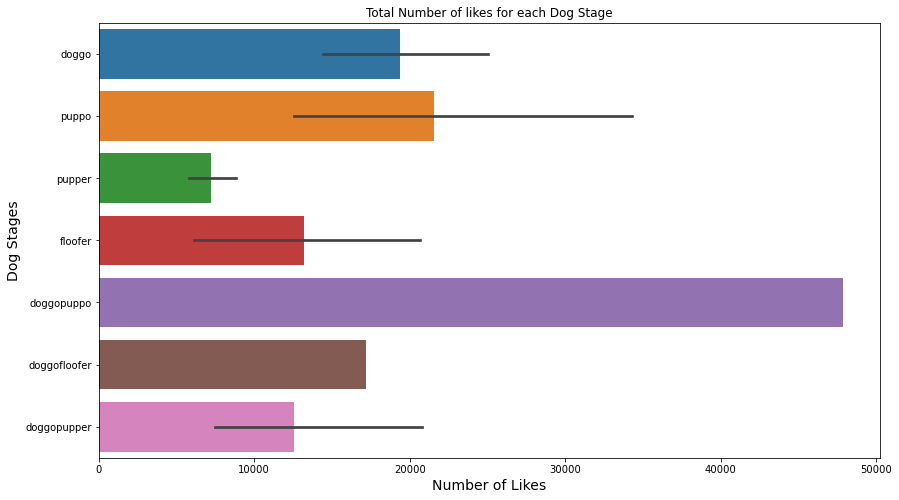

In [75]:
# plot a bar graph to show which dog stage gets the most likes
plt.figure(figsize = (14, 8))
sns.barplot(df.favorites, df.dog_stage.values)
plt.title('Total Number of likes for each Dog Stage')
plt.xlabel('Number of Likes', fontsize = 14)
plt.ylabel('Dog Stages', fontsize = 14)
plt.show()

**Q2. Which dog stage has the most retweets?**

/home/wangechi/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


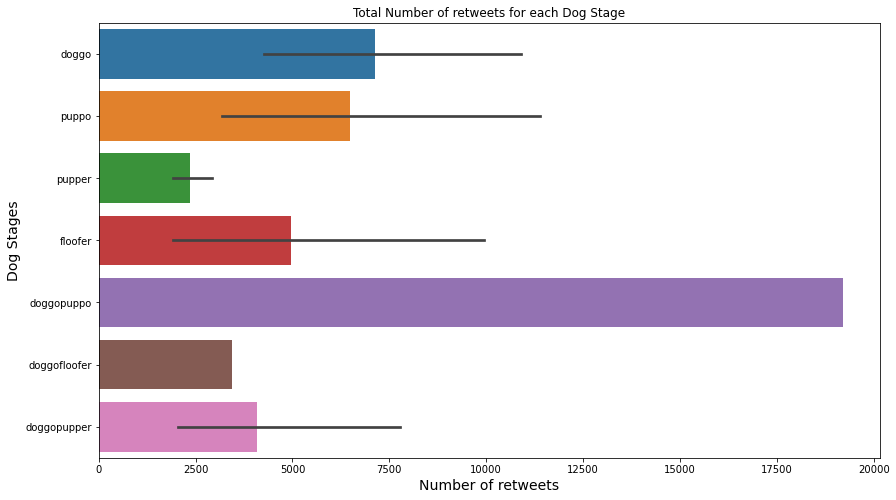

In [84]:
# plot a bar graph to show which dog stage gets the most retweets
plt.figure(figsize = (14, 8))
sns.barplot(df.retweets, df.dog_stage.values)
plt.title('Total Number of retweets for each Dog Stage')
plt.xlabel('Number of retweets', fontsize = 14)
plt.ylabel('Dog Stages', fontsize = 14)
plt.show()

**Q3. Which is the most common dog name?**

In [77]:
# Sort the names in an ascending order and get the first 5 common names
common_name = df['name'].value_counts().sort_values(ascending = False)[:5]

/home/wangechi/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


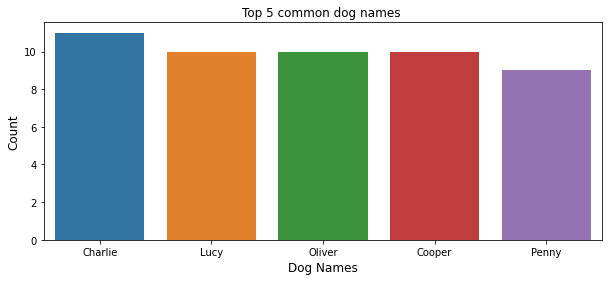

In [81]:
# plot a bar graph to show the most common dog name
plt.figure(figsize = (10, 4))
sns.barplot(common_name.index, common_name.values)
plt.title('Top 5 common dog names ')
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Dog Names', fontsize = 12)
plt.show();

### Insights:
1. Charlie is the most common name for the dogs being tweeted in the WeRateDogs twitter account.

2. The most common dog stage that is retweeted is doggo.

3. The most liked dog stage is doggopuppo followed by puppo.